<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.missourieconomy.org/indicators/cost_of_living/

https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2018&region=019

In [99]:
!pip install geopandas
!pip install descartes
!pip install mapclassify

  Stored in directory: /root/.cache/pip/wheels/64/65/1d/1de1fa57972cd410029dd8d07ffcca424e81598d427684096e
Successfully built mapclassify


In [0]:
import glob
import os
import pandas as pd
import dask.dataframe as dd
from os import listdir
from datetime import *
import io
import matplotlib.pyplot as plt
import geopandas as gpd

In [77]:
from google.colab import files
uploaded = files.upload()

Saving 2018 Annual Cost of Living Average.csv to 2018 Annual Cost of Living Average.csv


In [0]:
COLA_2018 = pd.read_csv(io.StringIO(uploaded['2018 Annual Cost of Living Average.csv'].decode('utf-8')), sep = ',')

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ImportError: ignored

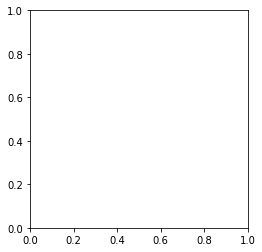

In [0]:
world.plot();

In [0]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [12.97194, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [77.59369, -47.91, -70.66, -74.08, -66.86]})

In [0]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [21]:
print(gdf.head())

           City    Country  Latitude  Longitude               geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)


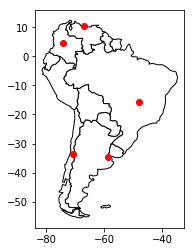

In [26]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [32]:
world[world['name']=='United States of America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


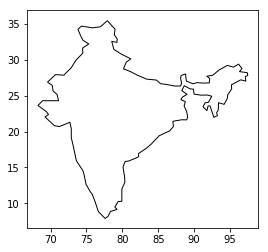

In [34]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'India'].plot(
    color='white', edgecolor='black')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [54]:
!ls -l "drive/My Drive/MSPA/Predict 455/"

total 167
drwx------ 2 root root   4096 May 23 00:33 states_21basic
-rw------- 1 root root 166595 May 23 00:42 states_21basic.zip


In [55]:
!unzip "drive/My Drive/MSPA/Predict 455/states_21basic.zip"

Archive:  drive/My Drive/MSPA/Predict 455/states_21basic.zip
  inflating: states.dbf              
  inflating: states.prj              
  inflating: states.sbn              
  inflating: states.sbx              
  inflating: states.shp              
  inflating: states.shp.xml          
  inflating: states.shx              


In [0]:
usa = gpd.read_file("states.shp")

In [0]:
USA_Mainland=usa[((usa['STATE_NAME'] != 'Alaska') & (usa['STATE_NAME'] != 'Hawaii'))]

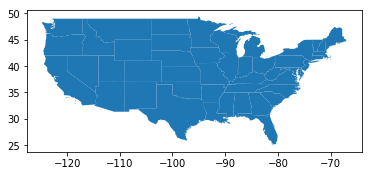

In [82]:
USA_Mainland.plot()

In [80]:
COLA_2018.head()

,State,Rank,Index,Grocery,Housing,Transportation,Utilities,Health Care,Misc
0,Mississippi,1,85.7,91.4,70.8,91.6,90.6,91.4,94.2
1,Oklahoma,2,88.1,92.5,74.6,92.7,95.7,95.4,95.5
2,Arkansas,3,88.4,96.5,76.4,90.9,91.1,85.9,91.2
3,Missouri,4,88.8,93.0,73.5,93.8,99.5,98.0,98.0
4,Michigan,5,89.3,94.6,78.0,101.0,96.6,92.8,85.9


In [0]:
merged = usa[((usa['STATE_NAME'] != 'Alaska') & (usa['STATE_NAME'] != 'Hawaii'))].merge(COLA_2018, left_on='STATE_NAME', right_on='State')

In [97]:
merged[['State', 'Index']].head()

,State,Index
0,Washington,109.5
1,Montana,104.0
2,Maine,117.2
3,North Dakota,98.7
4,South Dakota,98.5


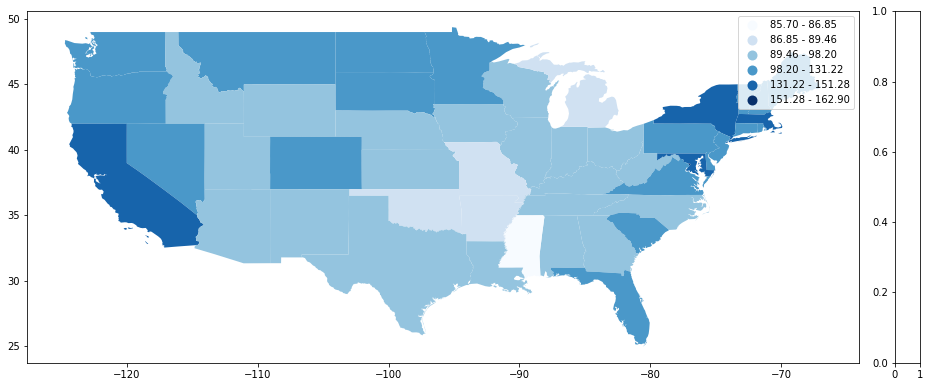

In [158]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
#figsize = (16, 10)
fig, ax = plt.subplots(figsize  = (16, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5)

#ax = 
merged.dropna().plot(column='Index', ax=ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, cax=cax)



#ax.legend(loc='lower right', frameon=False)

In [137]:
cax

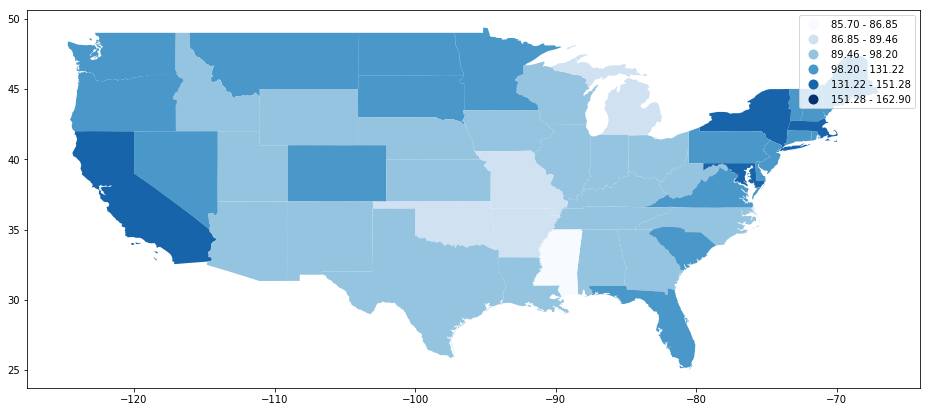

In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
figsize = (16, 14)


ax = merged.dropna().plot(column='Index', cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True)
ax.set_aspect('equal')

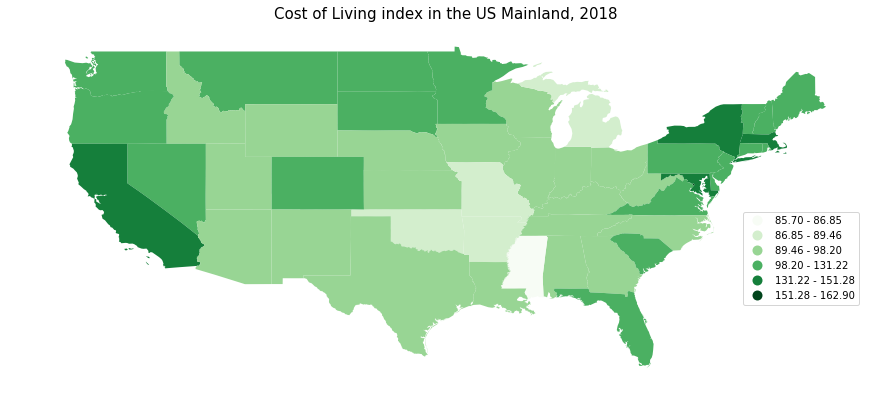

In [205]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Greens'
fig, ax = plt.subplots(figsize  = (15,9))


merged.plot(column='Index', ax = ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, legend_kwds={'loc': 'lower right'})
ax.set_aspect('equal')
plt.ylim([24, 51])
ax.set_axis_off()
ax.set_title("Cost of Living index in the US Mainland, 2018", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.2, 0.2, 0.2))
#plt.axis('equal');

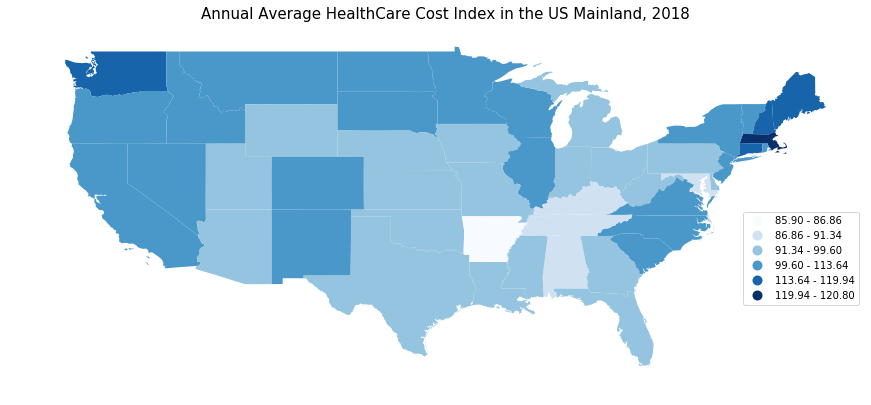

In [207]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
fig, ax = plt.subplots(figsize  = (15,9))


merged.plot(column='Health Care', ax = ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, legend_kwds={'loc': 'lower right'})
ax.set_aspect('equal')
plt.ylim([24, 51])
ax.set_axis_off()
ax.set_title("Annual Average HealthCare Cost Index in the US Mainland, 2018", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.2, 0.2, 0.2))
#plt.axis('equal');